In [48]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
from transform_factory import resize_322, center_crop_224

In [30]:
seed = 0
expl_method = "LayerXAct"

In [31]:
with open(f"./val_seed_{seed}.npy", "rb") as f:
    filepath_list = np.load(f)

for filepath in filepath_list[:1]:
    img_name = os.path.basename(filepath)
    print(img_name)

    results_path = f"results/val_seed_{seed}_pred_orig_eval_orig_transform_both_sign_all_reduction_sum/{img_name}_expl_{expl_method}_sample_2000_sigma_0.05_seed_{seed}_results.pkl"

    with open(results_path, "rb") as f:
        results = np.load(f, allow_pickle=True)

ILSVRC2012_val_00024718.JPEG


In [32]:
for res in results:
    print(res['zero_contain_rate'])

0.7062340561224489
0.5778061224489796
0.47909359056122447
0.4150390625
0.3719507334183674
0.33808992346938777
0.30642139668367346
0.2762476084183674
0.24774792729591838
0.22409119897959184
0.2019092793367347
0.18064413265306123
0.16015625
0.14186065051020408
0.12569754464285715
0.11407844387755102
0.10365513392857142
0.08555883290816327
0.05309311224489796


(array([  233.,   918.,  2319.,  5192.,  8000., 15444., 11301.,  5485.,
         1206.,    78.]),
 array([0.863 , 0.8702, 0.8774, 0.8846, 0.8918, 0.899 , 0.9062, 0.9134,
        0.9206, 0.9278, 0.935 ]),
 <BarContainer object of 10 artists>)

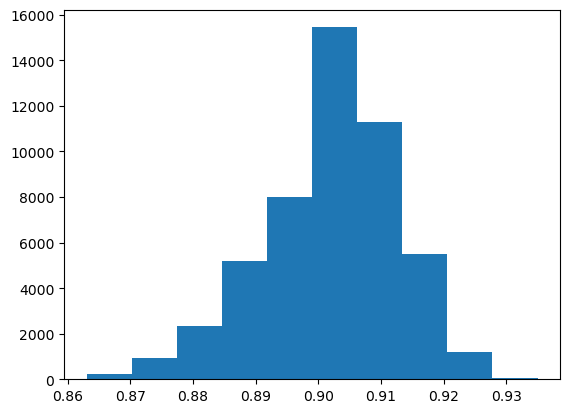

In [33]:
plt.hist(results[1]['coverage_prob'].flatten())

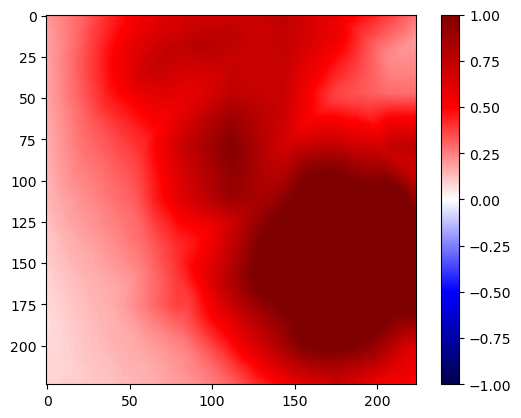

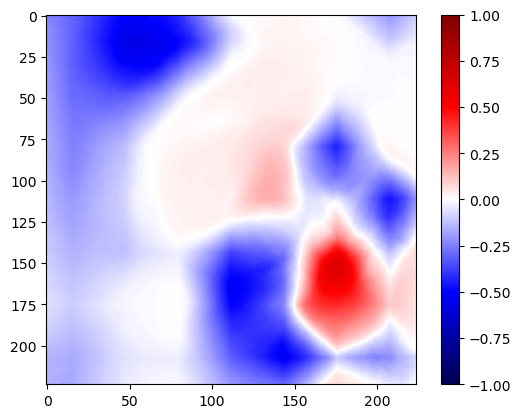

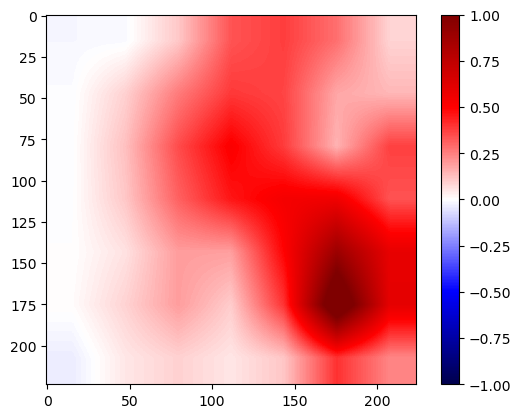

In [39]:
plt.imshow(results[0]['conf_high'].squeeze(), cmap="seismic")
plt.clim(-1, 1)
plt.colorbar()
plt.show()

plt.imshow(results[0]['conf_low'].squeeze(), cmap="seismic")
plt.clim(-1, 1)

plt.colorbar()
plt.show()

plt.imshow(results[0]['orig_expl'].squeeze(), cmap="seismic")
plt.clim(-1, 1)

plt.colorbar()
plt.show()


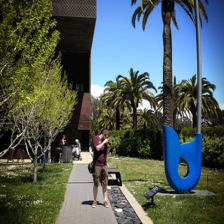

In [49]:
center_crop_224(resize_322(Image.open(filepath_list[0])))